In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Read the dataset
df= pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape


(1000, 8)

3. data Checks to perform
.check missing values
. check duplicates
. check data types
. check number of values of each column
. check statistics of the dataset
. check various categories present in differatn cat. columns

In [5]:
#check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#check duplicates
df.duplicated().sum()

0

# Observation or Insgight
There is no missing values


In [8]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#no of values in each column (test preparation course)
# df['test preparation course'].value_counts()
df['parental level of education'].value_counts()


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [10]:
#check the no. of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation

In [12]:
#seggregating numerical and categorical features
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature= [feature for feature in df.columns if df[feature].dtype=='O']

In [13]:
numerical_feature

['math score', 'reading score', 'writing score']

In [14]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [15]:
#Aggregated the total score with mean
df['total_score']= df['math score']+df['reading score']+df['writing score']
df['avg']= df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='avg', ylabel='Count'>

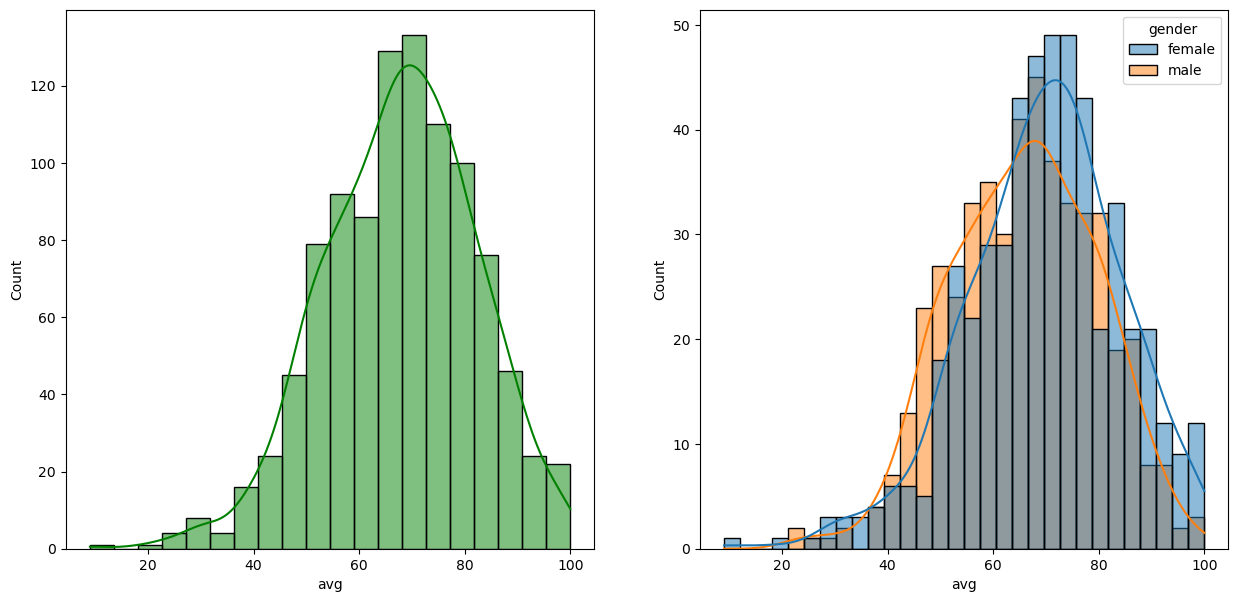

In [16]:
# Explore more on Visulization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg',bins=20, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='avg',bins=30, kde=True,hue='gender')

# Insights
Female students tends to perform well than the male students

<Axes: xlabel='avg', ylabel='Count'>

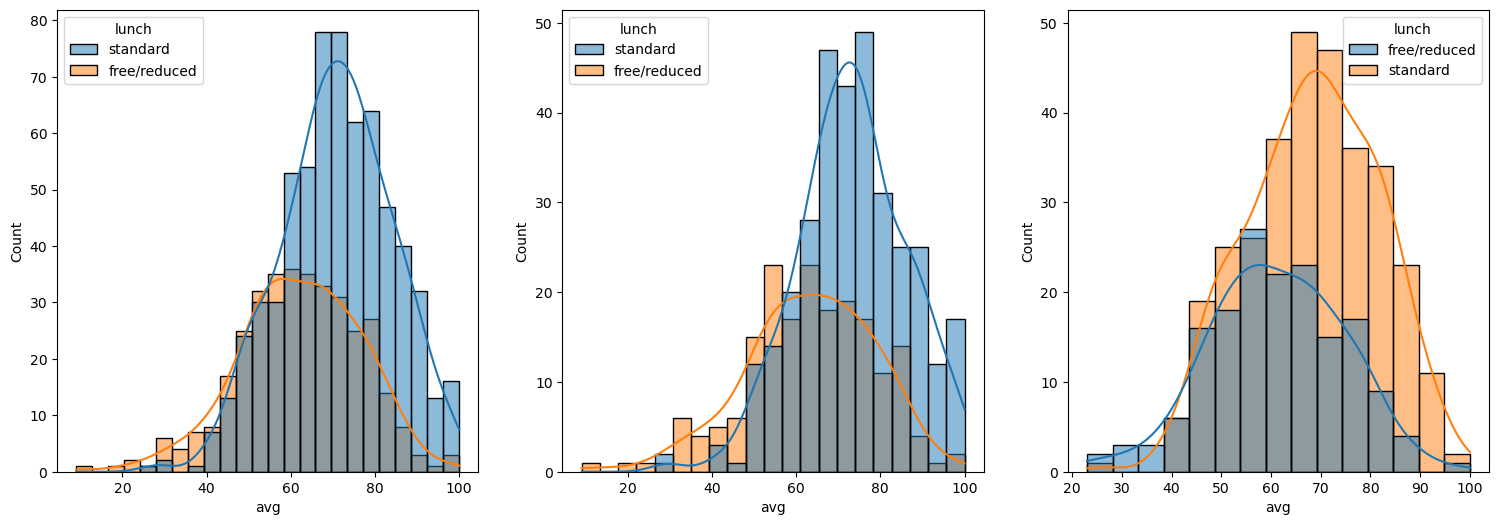

In [18]:
#How quality of Lunch affects the  Performance of students in Exams
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg',kde=True,hue='lunch')

#Insights
. Standard Lunch help in students perform well in exams
. Standard Lunch help perform well both male and female

<Axes: xlabel='avg', ylabel='Count'>

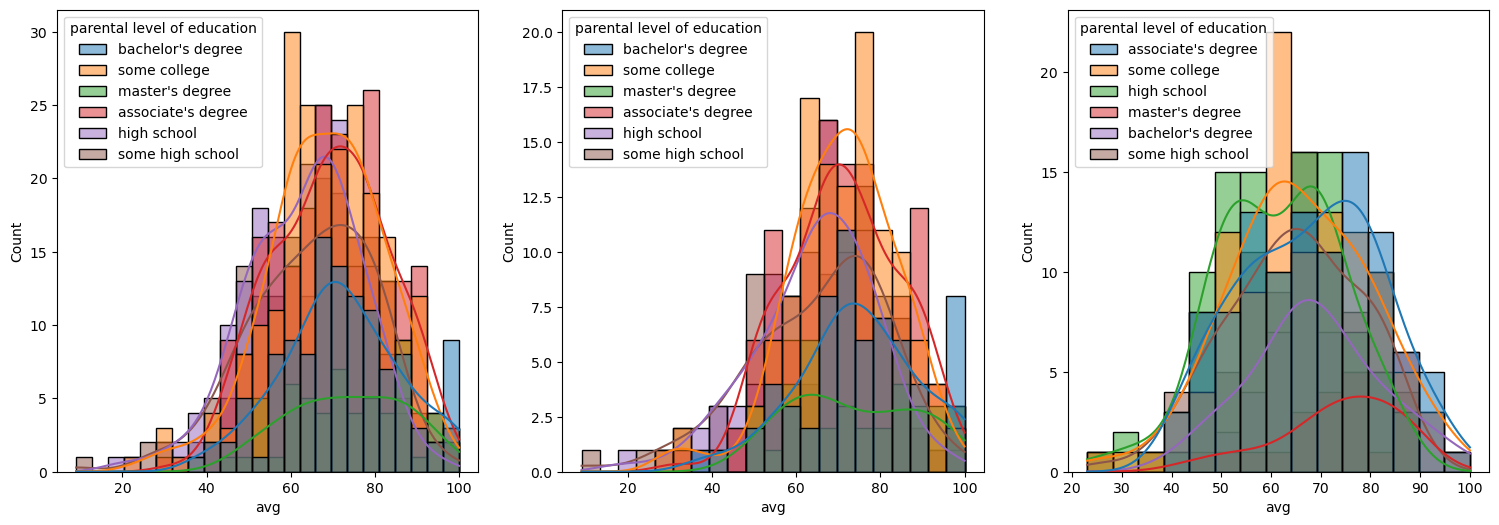

In [19]:
# Education of parensts

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg',kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg',kde=True, hue='parental level of education')

# Insights:
-> In general graph Parent's education don't help as such the students to perform well in Exams

-> In 2nd plot we can see there is no effect of parent's education on female students.

-> In 3rd plot shows that parent's whose education of associate's degree or master's degree their male child tend to perform well in Exams

<Axes: xlabel='avg', ylabel='Count'>

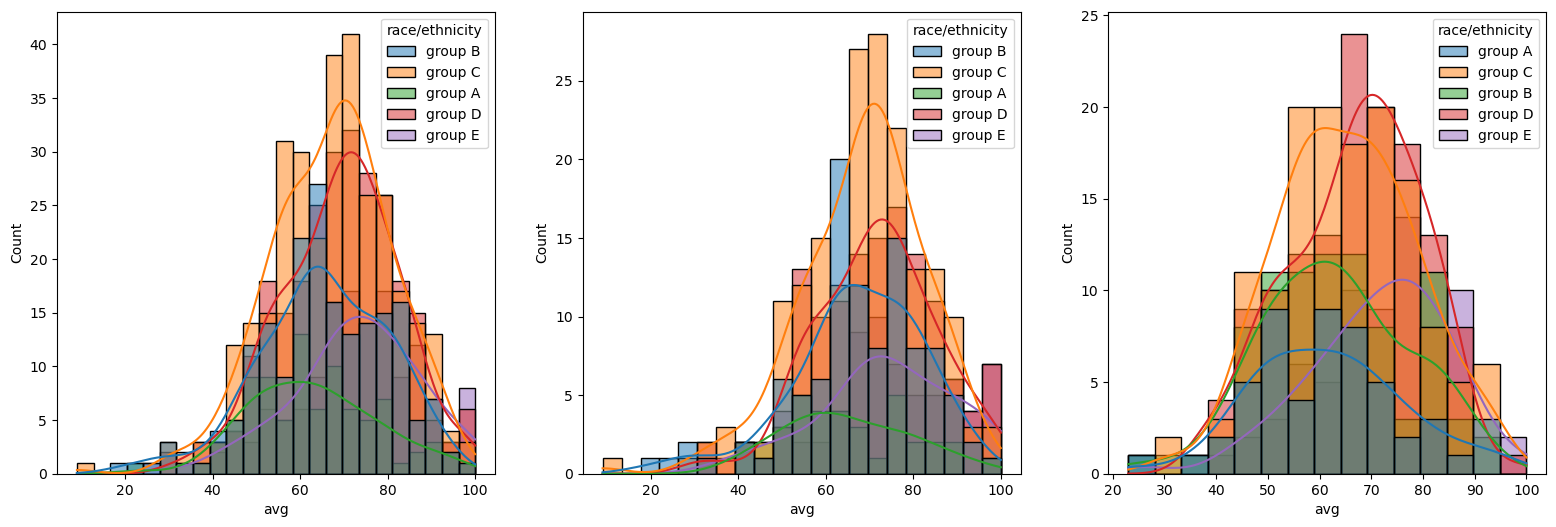

In [21]:
#race/ethnicity	

plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
sns.histplot(data=df,x='avg',kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], kde=True,x='avg',hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg',kde=True,hue='race/ethnicity')


#Observation from graph:

-> Students from group A tends to perform poorly in exams.

-> Students of group A and group B tends perform poorly in exams whether they are male or female.

In [22]:
sns.heatmap(df.corr(),annot=False)

ValueError: could not convert string to float: 'female'